#  **1. Basic Setup installing libraries& getting the data**

1.1. **Install Required Libraries**

In [ ]:
!pip install torch torchvision matplotlib tqdm pillow==11.0.0 -qU

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3/39.3 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/9

1.2. **Clone Project Repository**


In [ ]:
!git clone https://github.com/EyadAlN3imi/DS372-Forensics.git

Cloning into 'DS372-Forensics'...
remote: Enumerating objects: 661, done.
remote: Counting objects: 100% (661/661), done.
remote: Compressing objects: 100% (607/607), done.
remote: Total 661 (delta 53), reused 630 (delta 45), pack-reused 0 (from 0)
Receiving objects: 100% (661/661), 3.87 MiB | 20.30 MiB/s, done.
Resolving deltas: 100% (53/53), done.
Filtering content: 100% (331/331), 16.55 MiB | 3.21 MiB/s, done.


1.3. **Import Libraries and Dependencies**

In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import plotly.express as px
import plotly.graph_objects as go
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score, pairwise_distances
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler, LabelEncoder
from torchvision import transforms
from scipy.spatial.distance import pdist, squareform
from scipy.stats import f_oneway
from PIL import Image, ImageOps
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

1.4. **List Dataset Directory Contents**


In [ ]:
data_path = "/content/DS372-Forensics/Datasets/BPA_DATA"
os.listdir(data_path)

['FINAL_ALL_DATA.csv', 'FINAL_ALL_IMAGES']

1.5. **Validate and Remove Corrupted Images**


In [ ]:
img_dir = '/content/DS372-Forensics/Datasets/BPA_DATA/FINAL_ALL_IMAGES'
bad_images = []
for img_name in tqdm(df['image_name']):
    img_path = os.path.join(img_dir, img_name)
    try:
        img = Image.open(img_path)
        img.verify()
    except Exception as e:
        bad_images.append(img_name)

print(f"Found {len(bad_images)} corrupted images.")
if bad_images:
    df = df[~df['image_name'].isin(bad_images)]
    print("Corrupted images removed from dataframe.")

100%|██████████| 331/331 [00:00<00:00, 3573.42it/s]

Found 0 corrupted images.


1.6. **Load Metadata CSV File**

In [ ]:
df = pd.read_csv('/content/DS372-Forensics/Datasets/BPA_DATA/FINAL_ALL_DATA.csv')
df

,image_name,class,source_dataset
0,C1_beat.jpg,beating,beating
1,C10_beat.jpg,beating,beating
2,C11_beat.jpg,beating,beating
3,C12_beat.jpg,beating,beating
4,C2_beat.jpg,beating,beating
...,...,...,...
326,9-675.jpg,blood drip,paper75
327,9-775.jpg,blood drip,paper75
328,9-875.jpg,blood drip,paper75
329,9-975.jpg,blood drip,paper75


1.7. **Display DataFrame Info**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   image_name      331 non-null    object
 1   class           331 non-null    object
 2   source_dataset  331 non-null    object
 3   blob_count      331 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 10.5+ KB


1.8. **Calculate Total Image Storage Size**

In [ ]:
img_dir = os.path.join(data_path, "FINAL_ALL_IMAGES")
total_size_bytes = 0
for img_name in df['image_name']:
    img_path = os.path.join(img_dir, img_name)
    if os.path.exists(img_path):
        total_size_bytes += os.path.getsize(img_path)

total_size_mb = total_size_bytes / (1024 * 1024)

print(f"Total images storage size: {total_size_mb:.2f} MB")

Total images storage size: 16.55 MB


1.9. **Class Distribution Frequency Table**

In [ ]:
freq_table = pd.DataFrame({
    'Count': df['class'].value_counts(),
    'Percentage': df['class'].value_counts(normalize=True) * 100
})

freq_table['Cumulative %'] = freq_table['Percentage'][::-1].cumsum()[::-1].round(2)
freq_table['Percentage'] = freq_table['Percentage'].round(2)

freq_table

,Count,Percentage,Cumulative %
class,,,
blood drip,202,61.03,100.00
gun shot,68,20.54,38.97
beating,61,18.43,18.43


# **2. EDA Through Charts and Plots**

2.1. **Define Global Color Palette for Blood Pattern Classes**

In [ ]:
unique_classes = sorted(df['class'].unique())

palette = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A']

class_colors = {cls: palette[i % len(palette)] for i, cls in enumerate(unique_classes)}

print("Global Color Map Assigned:")
for cls, color in class_colors.items():
    print(f"  {cls}: {color}")

Global Color Map Assigned:
  beating: #636EFA
  blood drip: #EF553B
  gun shot: #00CC96


2.2. **Bar Chart: Blood Pattern Class Distribution**

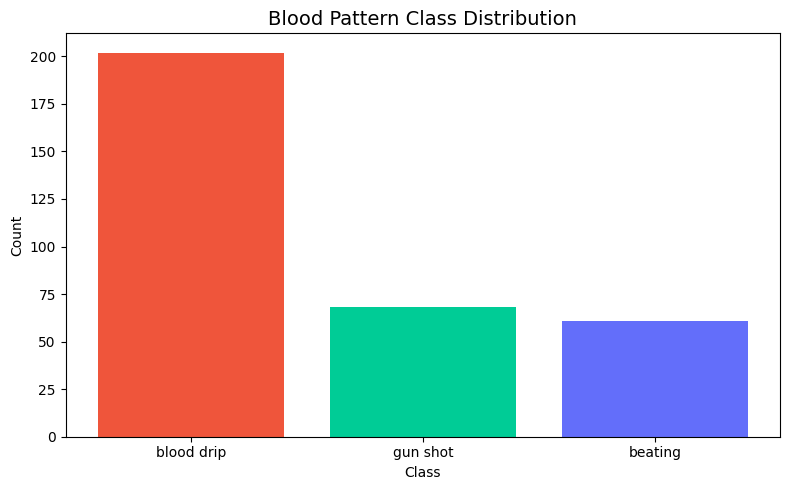

In [ ]:
counts = df['class'].value_counts()

plt.figure(figsize=(8, 5))

plt.bar(counts.index, counts.values, color=[class_colors[cls] for cls in counts.index])

plt.title("Blood Pattern Class Distribution", fontsize=14)
plt.xlabel("Class")
plt.ylabel("Count")

plt.tight_layout()

plt.show()

2.3. **Sample Images: One Random Example per Blood Pattern Class**

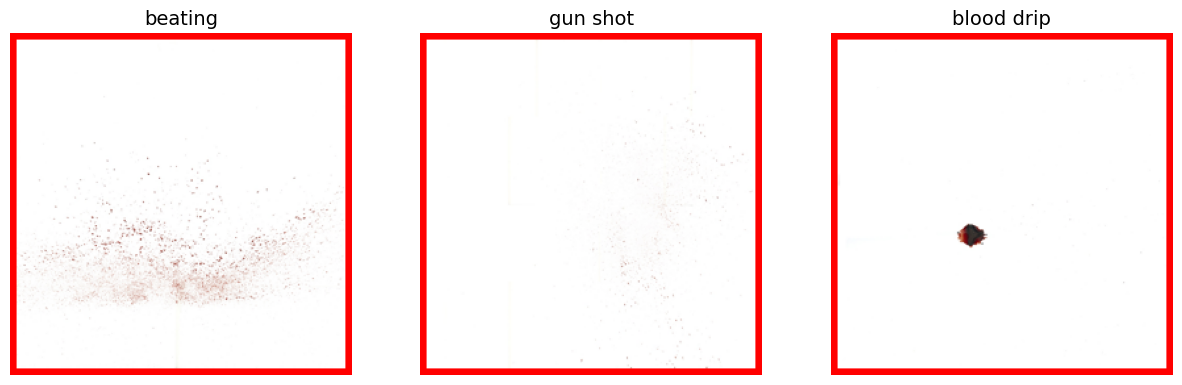

In [ ]:
img_dir = os.path.join(data_path, "FINAL_ALL_IMAGES")

classes = df['class'].unique()

fig, ax = plt.subplots(1, len(classes), figsize=(5 * len(classes), 6))

for i, cls in enumerate(classes):
    subset = df[df['class'] == cls]
    img_name = subset.sample(1)['image_name'].values[0]
    path = os.path.join(img_dir, img_name)

    img = Image.open(path).resize((250, 250))

    img = ImageOps.expand(img, border=5, fill="red")

    ax[i].imshow(img)
    ax[i].set_title(cls, fontsize=14)
    ax[i].axis("off")

plt.subplots_adjust(wspace=0.2)
plt.show()


2.4. **Image Physical Properties & Brightness Analysis per Class**

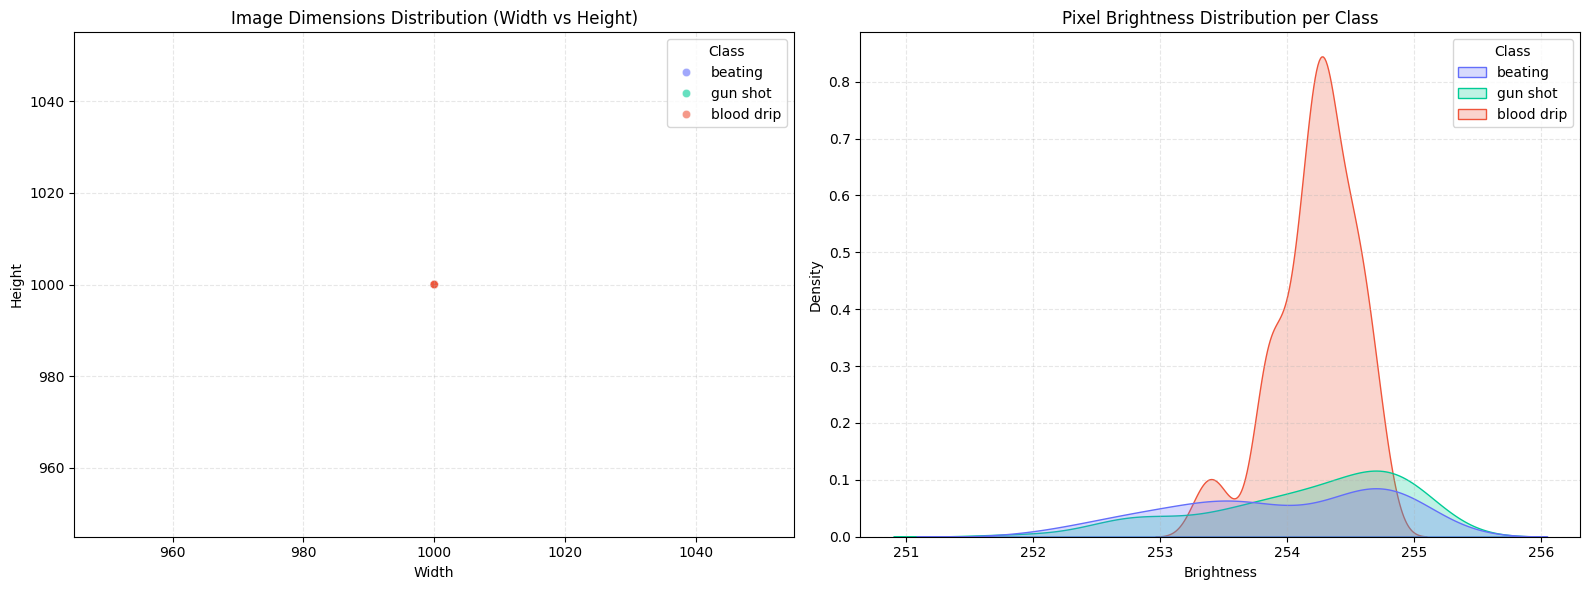

             Width  Height  Aspect Ratio  Brightness
Class                                               
beating     1000.0  1000.0           1.0      253.94
blood drip  1000.0  1000.0           1.0      254.23
gun shot    1000.0  1000.0           1.0      254.14


In [ ]:
image_stats = []

for idx, row in df.iterrows():
    img_path = os.path.join(img_dir, row['image_name'])

    try:
        img = cv2.imread(img_path)
        if img is None:
            continue

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        height, width, _ = img.shape
        mean_brightness = np.mean(img_rgb)
        aspect_ratio = width / height

        image_stats.append({
            'Class': row['class'],
            'Width': width,
            'Height': height,
            'Aspect Ratio': aspect_ratio,
            'Brightness': mean_brightness
        })
    except:
        continue

df_stats = pd.DataFrame(image_stats)

if not df_stats.empty:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    sns.scatterplot(data=df_stats, x='Width', y='Height', hue='Class', palette=class_colors, alpha=0.6, ax=axes[0])
    axes[0].set_title("Image Dimensions Distribution (Width vs Height)")
    axes[0].grid(True, linestyle='--', alpha=0.3)

    sns.kdeplot(data=df_stats, x='Brightness', hue='Class', fill=True, palette=class_colors, ax=axes[1])
    axes[1].set_title("Pixel Brightness Distribution per Class")
    axes[1].grid(True, linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()

    print(df_stats.groupby('Class')[['Width', 'Height', 'Aspect Ratio', 'Brightness']].mean().round(2))

2.5. **Blood Blob Detection Pipeline: Step-by-Step Visualization on Representative Samples**

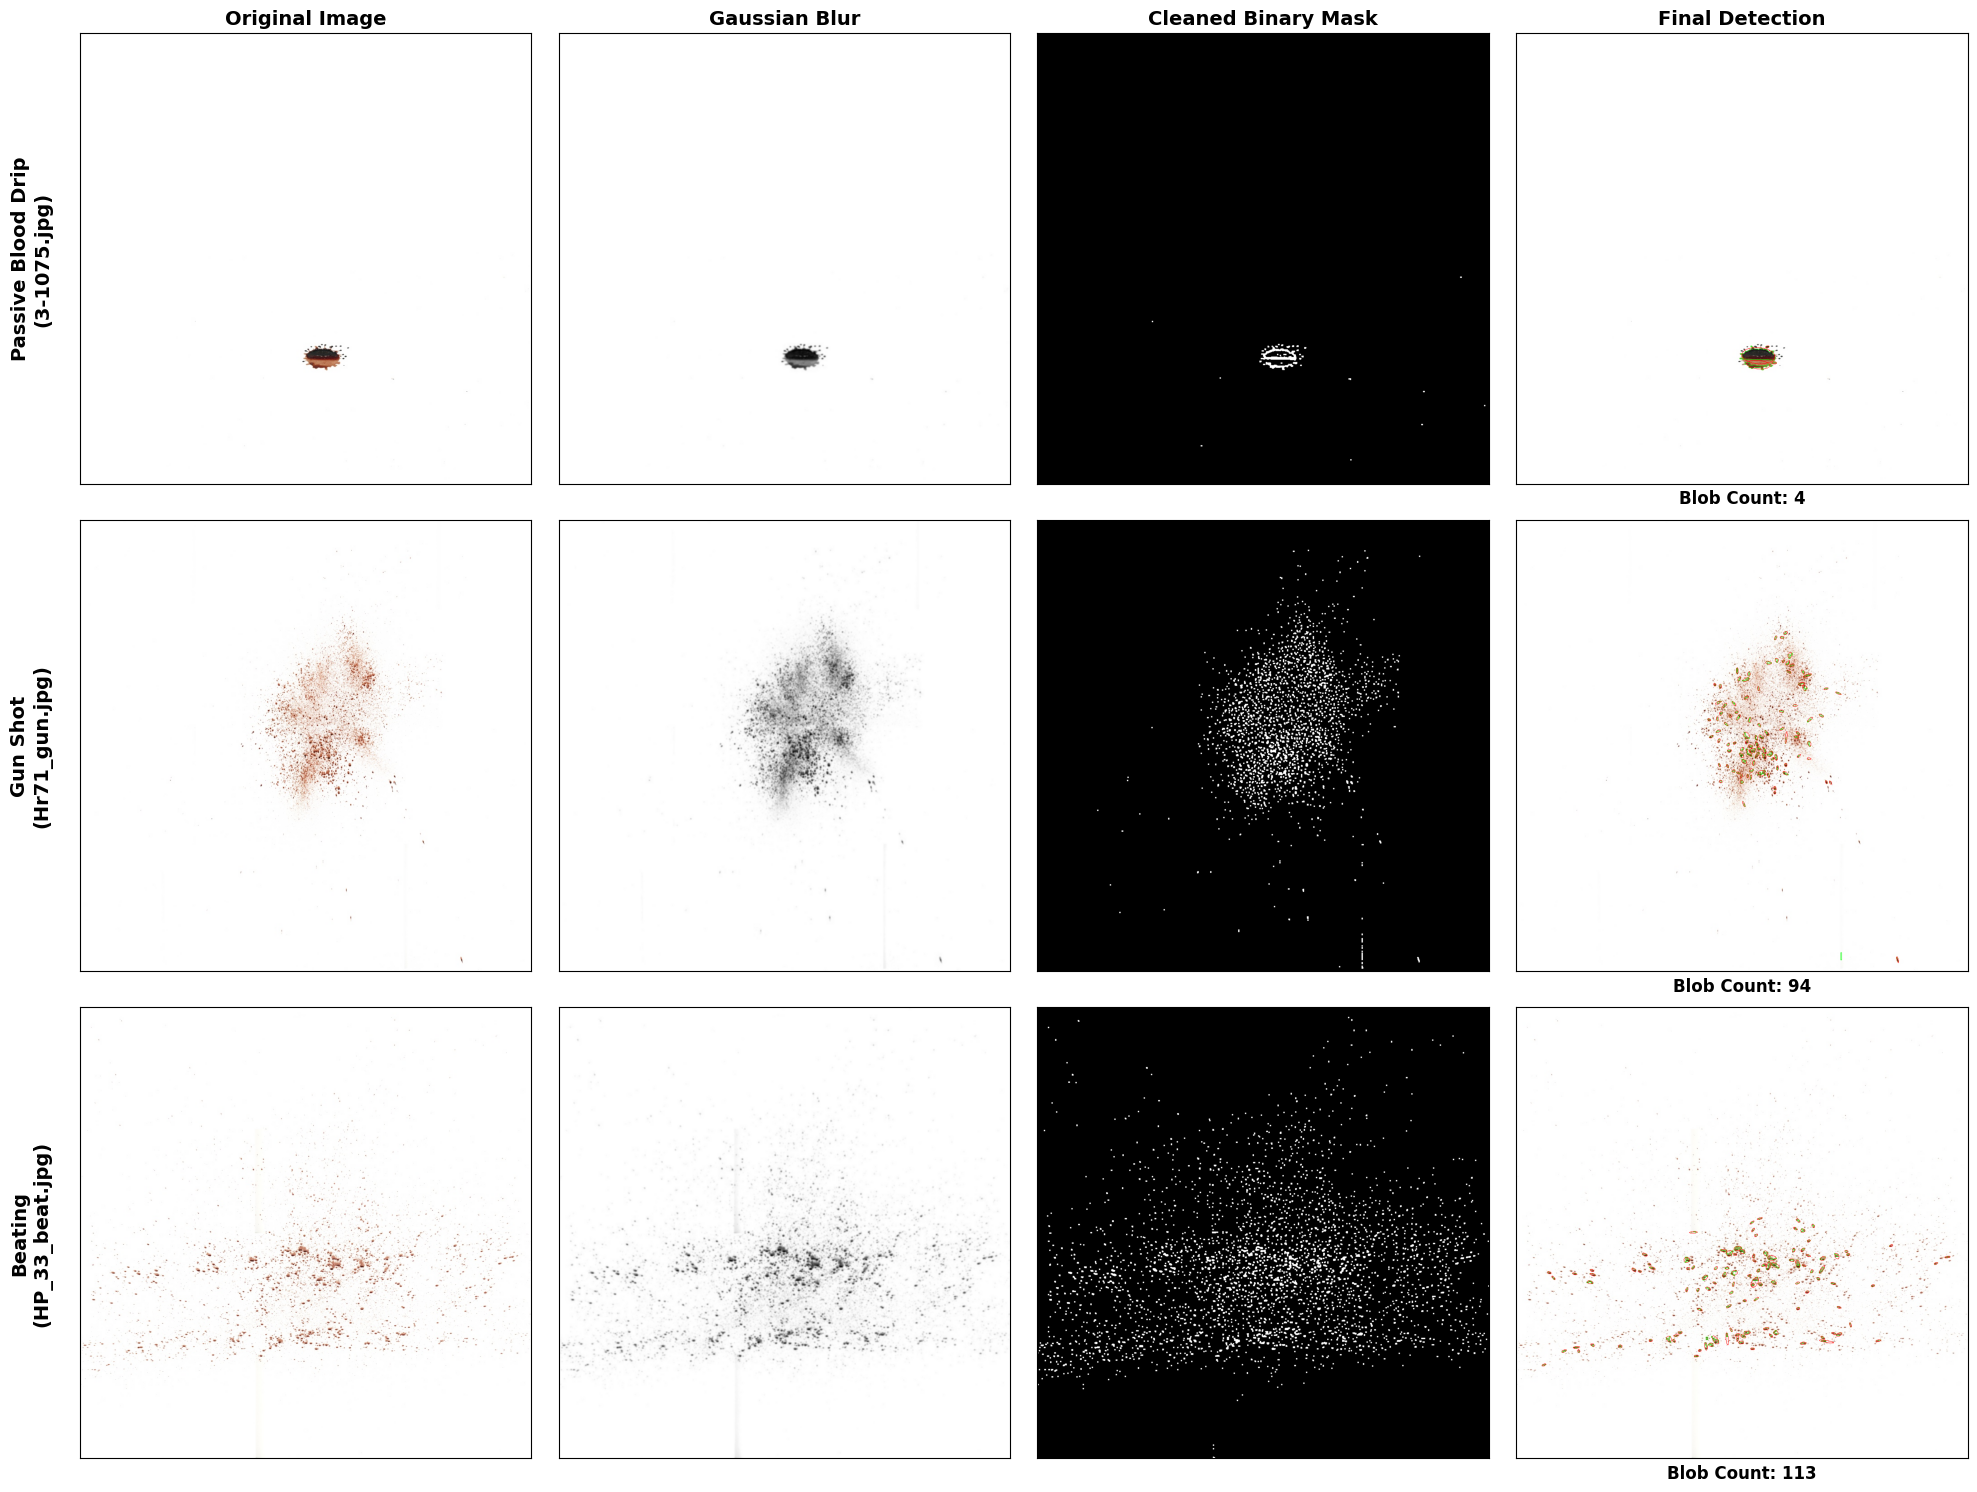

Processing complete. Visualization saved as 'Multi_Class_Process_Proof.png'


In [ ]:
def process_image(img_name):
    img_path = os.path.join(data_path, "FINAL_ALL_IMAGES", img_name)

    try:
        original_img = cv2.imread(img_path)
        if original_img is None:
            print(f"Image not found: {img_name}")
            return None

        original_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
        gray_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        enhanced_gray = clahe.apply(gray_img)

        blurred_img = cv2.GaussianBlur(enhanced_gray, (5, 5), 0)

        binary_img = cv2.adaptiveThreshold(blurred_img, 255,
                                         cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                         cv2.THRESH_BINARY_INV, 11, 2)

        kernel = np.ones((3,3), np.uint8)
        clean_binary = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, kernel, iterations=1)

        processed_img = original_rgb.copy()
        contours, _ = cv2.findContours(clean_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        valid_blobs = 0
        for cnt in contours:
            if cv2.contourArea(cnt) > 20:
                cv2.drawContours(processed_img, [cnt], -1, (0, 255, 0), 1)
                try:
                    if len(cnt) >= 5:
                        ellipse = cv2.fitEllipse(cnt)
                        (center, axes, angle) = ellipse
                        MA, ma = axes
                        if MA > 0 and ma > 0:
                            aspect_ratio = float(MA) / ma
                            if aspect_ratio > 0.1:
                                cv2.ellipse(processed_img, ellipse, (255, 0, 0), 1)
                                valid_blobs += 1
                except: pass

        return [original_rgb, blurred_img, clean_binary, processed_img], valid_blobs

    except Exception as e:
        print(f"Error processing {img_name}: {e}")
        return None

target_samples = [
    ("3-1075.jpg", "Passive Blood Drip"),
    ("Hr71_gun.jpg", "Gun Shot"),
    ("HP_33_beat.jpg", "Beating")
]

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
cols_titles = ["Original Image", "Gaussian Blur", "Cleaned Binary Mask", "Final Detection"]

for i, (img_name, class_label) in enumerate(target_samples):
    result = process_image(img_name)

    if result:
        images, count = result
        for j, img in enumerate(images):
            cmap = 'gray' if j in [1, 2] else None
            axes[i, j].imshow(img, cmap=cmap)

            if i == 0:
                axes[i, j].set_title(cols_titles[j], fontsize=14, fontweight='bold')

            if j == 0:
                axes[i, j].set_ylabel(f"{class_label}\n({img_name})", fontsize=14, fontweight='bold', rotation=90, labelpad=20)

            if j == 3:
                axes[i, j].set_xlabel(f"Blob Count: {count}", fontsize=12, fontweight='bold')

            axes[i, j].set_xticks([])
            axes[i, j].set_yticks([])
    else:
        for j in range(4):
            axes[i, j].text(0.5, 0.5, "Image Not Found", ha='center', va='center')
            axes[i, j].axis('off')

plt.tight_layout()
plt.show()
print("Processing complete. Visualization saved as 'Multi_Class_Process_Proof.png'")

2.6. **Morphological Features: Blob Count & Average Area per Class**

Starting Morphological Analysis...


100%|██████████| 331/331 [00:04<00:00, 68.94it/s] 



Plotting Geometric Properties...


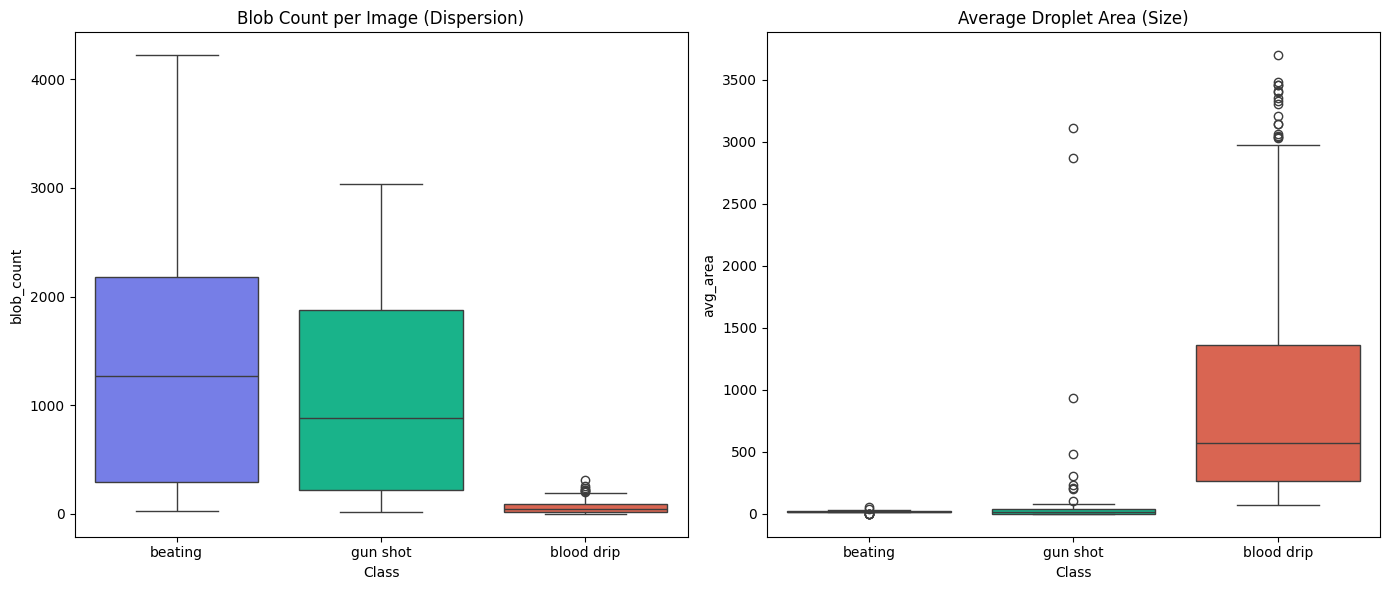


--- Summary Statistics by Class ---
            blob_count  avg_area
Class                           
beating        1306.64     18.26
blood drip       62.77    963.35
gun shot       1133.53    140.09


In [ ]:
def extract_morphological_features(img_path):
    try:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            return None

        _, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

        contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        blob_count = len(contours)
        areas = []

        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area > 10:
                areas.append(area)

        avg_area = np.mean(areas) if len(areas) > 0 else 0

        return {
            'blob_count': blob_count,
            'avg_area': avg_area
        }

    except Exception as e:
        return None

print("Starting Morphological Analysis...")

morph_data = []
img_dir = os.path.join(data_path, "FINAL_ALL_IMAGES")

for idx, row in tqdm(df.iterrows(), total=len(df)):
    img_path = os.path.join(img_dir, row['image_name'])
    features = extract_morphological_features(img_path)

    if features:
        features['Class'] = row['class']
        morph_data.append(features)

df_morph = pd.DataFrame(morph_data)

print("\nPlotting Geometric Properties...")
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=df_morph, x='Class', y='blob_count', palette=class_colors, ax=axes[0])
axes[0].set_title('Blob Count per Image (Dispersion)')
axes[0].set_yscale('log')

sns.boxplot(data=df_morph, x='Class', y='avg_area', palette=class_colors, ax=axes[1])
axes[1].set_title('Average Droplet Area (Size)')
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()

print("\n--- Summary Statistics by Class ---")
print(df_morph.groupby('Class').mean().round(2))

# **3. Visualizing Image Embeddings: An Exploratory Analysis**

3.1. **Load DINO-vit-small/16 Model & Define Embedding Extraction Function**

In [ ]:
dino_model = torch.hub.load('facebookresearch/dino:main', 'dino_vits16')
dino_model.eval()

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])
])

def get_dino_embedding(img_path):
    img = Image.open(img_path).convert("RGB")
    img = preprocess(img).unsqueeze(0)
    with torch.no_grad():
        emb = dino_model(img)
    return emb.cpu().numpy().flatten()

Downloading: "https://github.com/facebookresearch/dino/zipball/main" to /root/.cache/torch/hub/main.zip
Downloading: "https://dl.fbaipublicfiles.com/dino/dino_deitsmall16_pretrain/dino_deitsmall16_pretrain.pth" to /root/.cache/torch/hub/checkpoints/dino_deitsmall16_pretrain.pth


100%|██████████| 82.7M/82.7M [00:00<00:00, 221MB/s]


3.2. **Extract DINO Embeddings for All Images**

In [ ]:
embeddings = []
labels = []

print(f"Processing {len(df)} images...")
for idx, row in tqdm(df.iterrows(), total=len(df)):
    img_path = os.path.join(img_dir, row['image_name'])
    label = row['class']

    emb = get_dino_embedding(img_path)
    embeddings.append(emb)
    labels.append(label)

embeddings = np.array(embeddings)
labels = np.array(labels)

print(f"\nEmbeddings extracted")
print(f"  - Shape: {embeddings.shape}")
print(f"  - Embedding dimension: {embeddings.shape[1]}")

Processing 331 images...


100%|██████████| 331/331 [01:15<00:00,  4.40it/s]


Embeddings extracted
  - Shape: (331, 384)
  - Embedding dimension: 384


3.3. **Normalize DINO Embeddings with StandardScaler**

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(embeddings)

print(f"✓ Features normalized")
print(f"  - Shape: {X_scaled.shape}")
print(f"  - Mean: {X_scaled.mean(axis=0)[:5]}...")
print(f"  - Std: {X_scaled.std(axis=0)[:5]}...")

✓ Features normalized
  - Shape: (331, 384)
  - Mean: [ 3.2413403e-09 -3.1513029e-08  8.9677080e-08 -2.3330896e-08
  1.1668825e-07]...
  - Std: [1.         1.0000001  1.0000001  0.99999976 1.0000001 ]...


3.4. **3D t-SNE Projection of DINO Embeddings**

In [ ]:
tsne = TSNE(
    n_components=3,
    learning_rate='auto',
    init='pca',
    perplexity=15,
    random_state=42
)

X_tsne = tsne.fit_transform(X_scaled)

print(f"t-SNE - Shape: {X_tsne.shape}")

t-SNE - Shape: (331, 3)


3.5. **3D t-SNE Visualization of DINO Embeddings Colored by Blood Pattern Class**

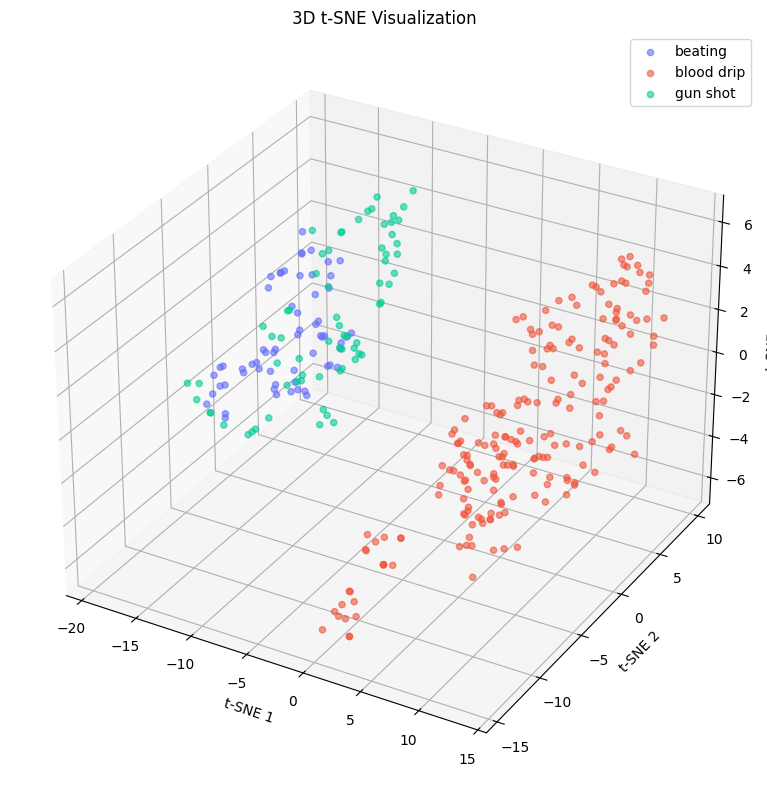

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for label in np.unique(labels):
    mask = labels == label
    ax.scatter(X_tsne[mask, 0], X_tsne[mask, 1], X_tsne[mask, 2],
               c=class_colors[label],
               label=label,
               s=20,
               alpha=0.6)

ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
ax.set_zlabel('t-SNE 3')
ax.set_title('3D t-SNE Visualization')
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
fig = px.scatter_3d(
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    z=X_tsne[:, 2],
    color=labels,
    title="3D t-SNE Visualization",
    labels={
        "x": "t-SNE 1",
        "y": "t-SNE 2",
        "z": "t-SNE 3",
        "color": "Class"
    },
    color_discrete_map=class_colors
)

fig.update_traces(marker=dict(size=4))
fig.show()

3.6. **Interactive 3D PCA with Class Centroid Vectors and Direction Cones**

In [ ]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)[-1]

fig = go.Figure()

unique_labels = np.unique(labels)

for label in unique_labels:
    mask = (labels == label)
    points = X_pca[mask]

    color = class_colors[label]

    center = np.mean(points, axis=0)

    fig.add_trace(go.Scatter3d(
        x=points[:, 0], y=points[:, 1], z=points[:, 2],
        mode='markers',
        marker=dict(size=4, color=color),
        name=label,
        showlegend=True
    ))

    fig.add_trace(go.Scatter3d(
        x=[0, center[0]], y=[0, center[1]], z=[0, center[2]],
        mode='lines',
        line=dict(color=color, width=5),
        showlegend=False,
        hoverinfo='skip'
    ))

    fig.add_trace(go.Cone(
        x=[center[0]], y=[center[1]], z=[center[2]],
        u=[center[0]], v=[center[1]], w=[center[2]],
        anchor="tip",
        sizemode="absolute",
        sizeref=0.5,
        showscale=False,
        colorscale=[[0, color], [1, color]],
        hoverinfo='skip',
        showlegend=False
    ))

fig.update_layout(
    title=f"3D PCA with Class Vectors (Cumulative Variance: {cumulative_variance:.2%})",
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    legend_title="Class",
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()

3.7. **Class Centroids and Intra-Class Spread Analysis**

In [ ]:
mean_vectors = []
class_stats = []

for label in unique_labels:
    mask = (labels == label)
    class_data = X_scaled[mask]

    centroid = np.mean(class_data, axis=0)
    mean_vectors.append(centroid)

    spread = np.mean(np.std(class_data, axis=0))

    class_stats.append({
        'Class': label,
        'Avg Variance (Spread)': spread
    })

mean_vectors_array = np.array(mean_vectors)
stats_df = pd.DataFrame(class_stats)

print("## Class Centroids Extraction Complete")
print(f"Shape of Mean Vectors: {mean_vectors_array.shape}")
print("\n## Class Spread Statistics")
print(stats_df.to_markdown(index=False))

## Class Centroids Extraction Complete
Shape of Mean Vectors: (3, 384)

## Class Spread Statistics
| Class      |   Avg Variance (Spread) |
|:-----------|------------------------:|
| beating    |                0.814311 |
| blood drip |                0.829755 |
| gun shot   |                0.941663 |


3.8.**Cosine Similarity Heatmap of Class Mean Vectors**

## Similarity Heatmap (Alignment of Mean Vectors)


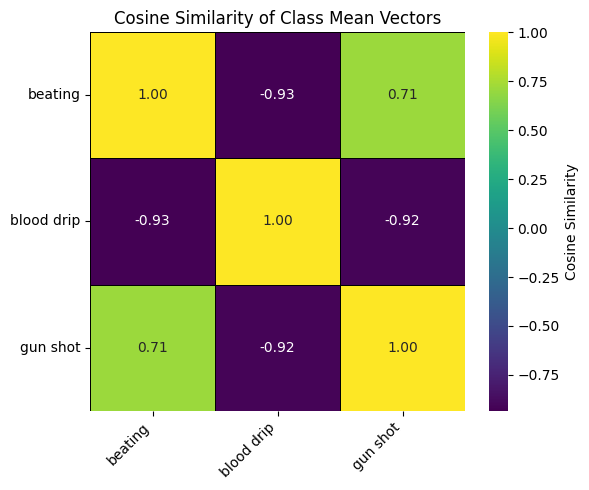

In [ ]:
corr_matrix = cosine_similarity(mean_vectors_array)
corr_df = pd.DataFrame(corr_matrix, index=unique_labels, columns=unique_labels)
print("## Similarity Heatmap (Alignment of Mean Vectors)")

plt.figure(figsize=(6, 5))
sns.heatmap(corr_df, annot=True, cmap="viridis", fmt=".2f", linewidths=.5, linecolor='black', cbar_kws={'label': 'Cosine Similarity'})
plt.title("Cosine Similarity of Class Mean Vectors")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("correlation_heatmap.png")

3.9. **Cluster Quality & Inter-Class Separability Analysis**
**(Subsection: Global Silhouette Score + Inter-Class Euclidean Distance Heatmap)**

Global Silhouette Score: 0.1824


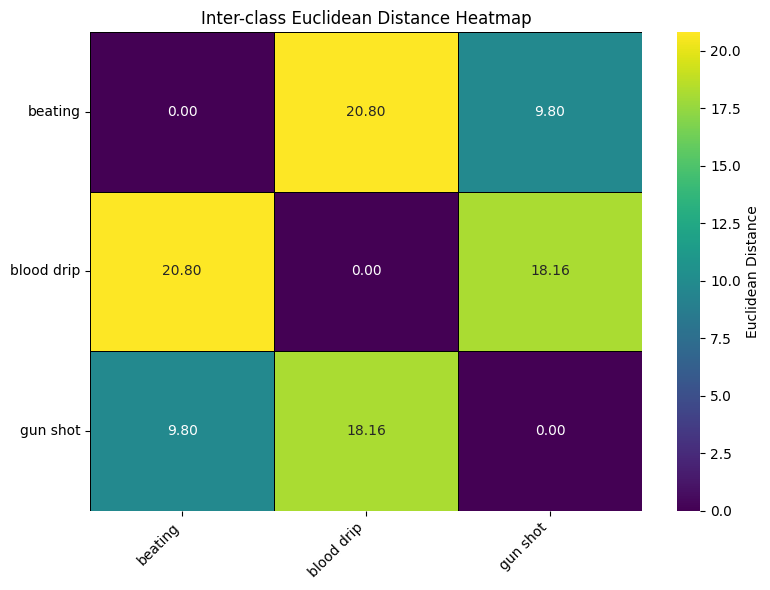

In [ ]:
sil_score = silhouette_score(X_scaled, labels)
print(f"Global Silhouette Score: {sil_score:.4f}")

centroids = []
for cls in unique_classes:
    mask = labels == cls
    centroids.append(X_scaled[mask].mean(axis=0))

centroids = np.array(centroids)

dist_matrix = pairwise_distances(centroids)
df_dist = pd.DataFrame(dist_matrix, index=unique_classes, columns=unique_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(df_dist,
            annot=True,
            fmt=".2f",
            cmap="viridis",
            linewidths=0.5,
            linecolor='black',
            cbar_kws={'label': 'Euclidean Distance'})

plt.title("Inter-class Euclidean Distance Heatmap")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

3.10. **Hierarchical Clustering Dendrogram of Blood Pattern Classes**

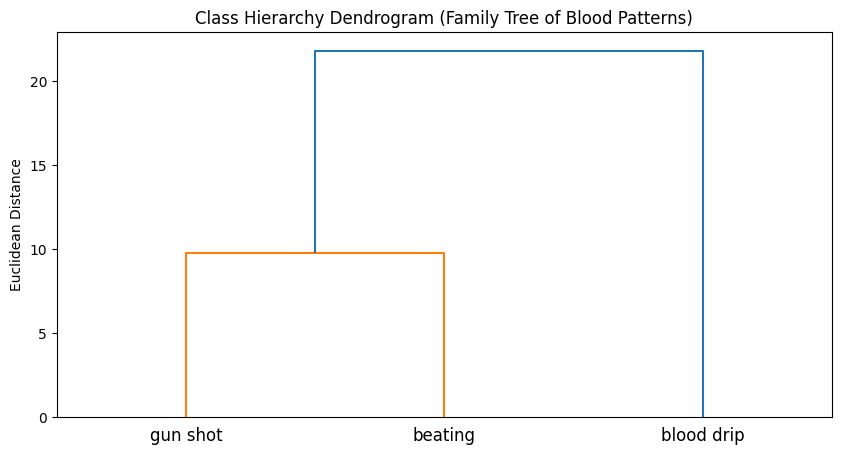

In [ ]:
centroids = np.array([X_scaled[labels == cls].mean(axis=0) for cls in unique_classes])

linked = linkage(centroids, 'ward')

plt.figure(figsize=(10, 5))
plt.title('Class Hierarchy Dendrogram (Family Tree of Blood Patterns)')
dendrogram(linked,
           labels=unique_classes,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.ylabel('Euclidean Distance')
plt.show()

3.11. **Hard Sample Visualization: Beating vs Gun Shot Confusion Analysis**

--- Investigating Overlap: Beating vs Gun shot ---
Found 9 hard samples in 'beating' looks like 'gun shot'


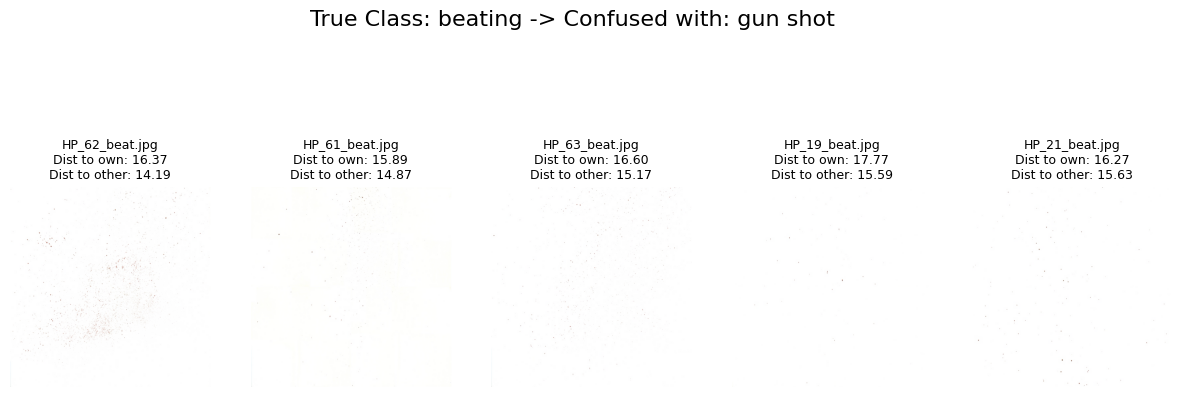

Found 10 hard samples in 'gun shot' looks like 'beating'


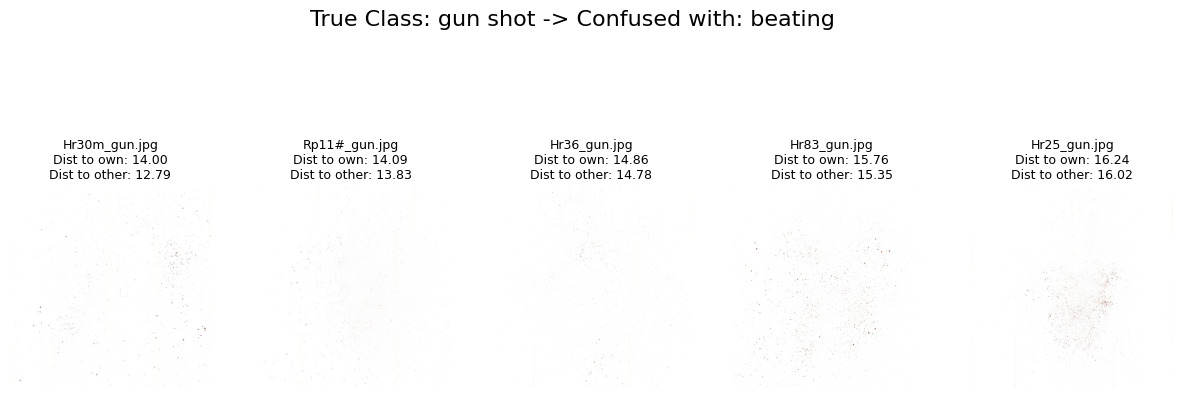

In [ ]:
def visualize_hard_samples(class_a, class_b, embeddings, labels, df, img_dir, num_show=5):
    idxs_a = np.where(labels == class_a)[0]
    idxs_b = np.where(labels == class_b)[0]

    centroid_a = embeddings[idxs_a].mean(axis=0).reshape(1, -1)
    centroid_b = embeddings[idxs_b].mean(axis=0).reshape(1, -1)

    dists_a_to_own = cdist(embeddings[idxs_a], centroid_a).flatten()
    dists_a_to_other = cdist(embeddings[idxs_a], centroid_b).flatten()

    hard_idxs_a = idxs_a[dists_a_to_other < dists_a_to_own]

    hard_idxs_a = hard_idxs_a[np.argsort(dists_a_to_other[dists_a_to_other < dists_a_to_own])]

    print(f"Found {len(hard_idxs_a)} hard samples in '{class_a}' looks like '{class_b}'")

    if len(hard_idxs_a) > 0:
        fig, axes = plt.subplots(1, min(num_show, len(hard_idxs_a)), figsize=(15, 5))
        if num_show == 1: axes = [axes]

        fig.suptitle(f"True Class: {class_a} -> Confused with: {class_b}", fontsize=16, y=1.05)

        for i, idx in enumerate(hard_idxs_a[:num_show]):
            img_name = df.iloc[idx]['image_name']
            img_path = os.path.join(img_dir, img_name)

            try:
                img = Image.open(img_path)
                axes[i].imshow(img)
                axes[i].set_title(f"{img_name}\nDist to own: {dists_a_to_own[np.where(idxs_a==idx)[0][0]]:.2f}\nDist to other: {dists_a_to_other[np.where(idxs_a==idx)[0][0]]:.2f}", fontsize=9)
                axes[i].axis('off')
            except Exception as e:
                print(f"Could not read image {img_name}: {e}")
        plt.show()
    else:
        print(f"No hard samples found for {class_a} confused with {class_b}!")

print("--- Investigating Overlap: Beating vs Gun shot ---")
visualize_hard_samples('beating', 'gun shot', X_scaled, labels, df, img_dir)
visualize_hard_samples('gun shot', 'beating', X_scaled, labels, df, img_dir)

3.12. **2D Linear Discriminant Analysis (LDA) – Optimal Class Separation Visualization**

LDA transformation complete.
  - Original Shape: (331, 384)
  - LDA Shape: (331, 2)


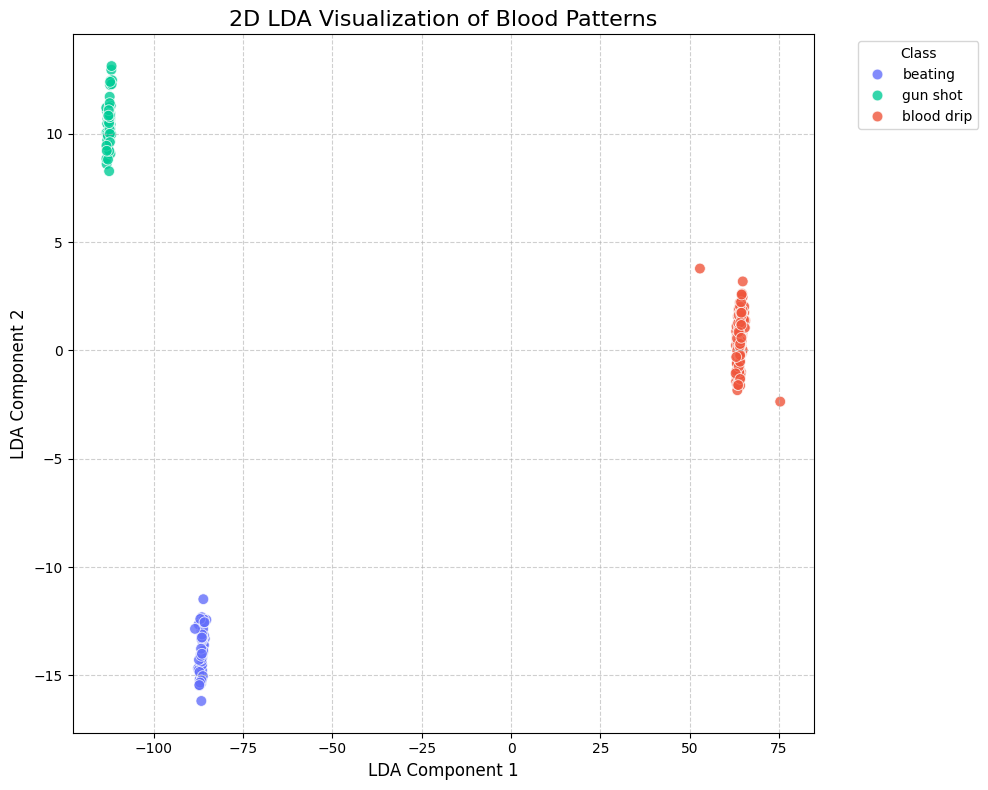

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, labels)

print(f"LDA transformation complete.")
print(f"  - Original Shape: {X_scaled.shape}")
print(f"  - LDA Shape: {X_lda.shape}")

lda_df = pd.DataFrame(data=X_lda, columns=['LDA Component 1', 'LDA Component 2'])
lda_df['Class'] = labels

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=lda_df,
    x='LDA Component 1',
    y='LDA Component 2',
    hue='Class',
    palette=class_colors,
    alpha=0.8,
    s=60
)

plt.title("2D LDA Visualization of Blood Patterns", fontsize=16)
plt.xlabel("LDA Component 1", fontsize=12)
plt.ylabel("LDA Component 2", fontsize=12)
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()